In [1]:
"""
    Experimentation with neural networks on a datset of MRI covid/non-covid images.
    
    Created: 10/21/2020
    Author(s): Ben Flanders (brf97486)

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler


In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 16




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  0.0
filepath:  C:\Users\brf97486\Documents\GitHub\COVID-19-CT-image-analysis-CSCI_8955\data\CT_NonCOVID\2143.png
image dimensions:  (161, 274, 3)
image datatype:  uint8
image max:  255
image min


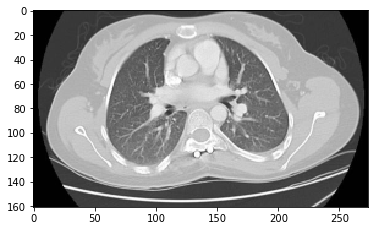

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

In [8]:
# get the image data and load it into memory

train_X = np.asarray([dh.load_image(fp, resize=True) for (fp, label) in train_data]).astype('uint8')
train_y = np.asarray([label for (fp, label) in train_data]).astype('float16')

test_X = np.asarray([dh.load_image(fp, resize=True) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')

In [9]:

i = Input([299, 299, 3], dtype=tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.keras.applications.inception_v3.preprocess_input(x)
core = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
core.trainable = False
x = core(x)
x = Flatten()(x)
x = Dense(1024, activation='relu', dtype=tf.float32)(x)
prediction = Dense(1, activation='sigmoid', dtype=tf.float32)(x)


model = tf.keras.Model(inputs=[i], outputs=[prediction])

#img = tf.image.decode_jpeg(tf.io.read_file(datapoint[0]))
#result = model(img)

# model = tf.keras.applications.InceptionV3(include_top=)


# compile model to train based on mse using the Adam Optimizer. Metrics displayed is accuracy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)             

In [11]:
model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, validation_data=(test_X, test_y), epochs=20)

Epoch 1/20
38/38 [==============================] - 10s 252ms/step - loss: 19.9218 - acc: 0.5956 - val_loss: 12.3788 - val_acc: 0.4733
Epoch 2/20
38/38 [==============================] - 6s 153ms/step - loss: 3.9012 - acc: 0.7970 - val_loss: 6.6061 - val_acc: 0.5667
Epoch 3/20
38/38 [==============================] - 6s 153ms/step - loss: 2.1673 - acc: 0.8607 - val_loss: 6.1264 - val_acc: 0.6000
Epoch 4/20
38/38 [==============================] - 6s 153ms/step - loss: 0.8153 - acc: 0.9094 - val_loss: 8.6659 - val_acc: 0.6400
Epoch 5/20
38/38 [==============================] - 6s 154ms/step - loss: 0.4318 - acc: 0.9413 - val_loss: 7.5320 - val_acc: 0.6267
Epoch 6/20
38/38 [==============================] - 6s 154ms/step - loss: 1.2961 - acc: 0.9060 - val_loss: 6.8105 - val_acc: 0.6867
Epoch 7/20
38/38 [==============================] - 6s 154ms/step - loss: 0.0173 - acc: 0.9950 - val_loss: 6.3427 - val_acc: 0.6733
Epoch 8/20
38/38 [==============================] - 6s 154ms/step - loss:

In [13]:
datapoint = test_data[len(test_data)-1]

img_data = np.asarray([dh.load_image(datapoint[0], resize=True)]).astype('uint8')

print("datapoint label: ", datapoint[1])
print("model prediction: ", model.predict(img_data))

datapoint label:  1.0
model prediction:  [[6.8096475e-12]]
